In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis

from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
tickers1 = ['GCCHX', 'SPYX', 'ESGD']
tickers2 = ['CTEC', 'CRBN', 'EFAX']
tickers3 = ['ETHO', 'FAN']
tickers4 = ['SPY']

# These are the tickers we discussed that have data that can be pulled from Alapaca. I havent tried other API's yet. 
tickersfin = ['ESGD','EFAX','SPYX', 'CRBN', 'ETHO', 'FAN']

timeframe = "1D"

# Pulling just a year for now to ensure they have usable data: 
start_date = pd.Timestamp("2017-05-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

# Ignore 
esg_data1 = api.get_barset(
    tickers1,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data2 = api.get_barset(
    tickers2,
    timeframe,
    start=start_date,
    end=end_date
).df

# ignore 
esg_data3 = api.get_barset(
    tickers3,
    timeframe,
    start=start_date,
    end=end_date
).df

# Here is the API call for the working tickers: 
esg_datafin = api.get_barset(
    tickersfin,
    timeframe,
    start=start_date,
    end=end_date
).df

# API call for SP500
sp500_data = api.get_barset(
    tickers4,
    timeframe,
    start=start_date,
    end=end_date
).df 


# esg_data1.tail(10)
esg_datafin.tail(10)


CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2020-12-31 00:00:00-05:00  148.79  149.1200  148.4344  148.8900  11051.0   
2021-01-04 00:00:00-05:00  150.57  150.5700  147.3300  148.2600  22735.0   
2021-01-05 00:00:00-05:00  148.31  149.9300  148.3100  149.7400  18455.0   
2021-01-06 00:00:00-05:00  149.04  151.6100  148.9950  150.3299   8590.0   
2021-01-07 00:00:00-05:00  151.03  152.2400  151.0300  152.2400  10608.0   
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                             EFAX                                     ...  \
                             open    high      low    close   volume  ...   
time                                                                  ...   
2020-12-31 00:00:00-05:00  78.250  78.250  77.8541  77.9700   2813.0  ...   
2021-01-04 00:00:00-05:00  79.320  79.320  77.9600  78.3900  14051.0  ...   
2021-01-05 00:00:00-05:00  78.660  79.108  78.4300  79.0800  10190.0  ...   
2021-01-06 00:00:00-05:00  79.320  79.790  79.3200  79.7000   6864.0  ...   
2021-01-07 00:00:00-05:00  79.230  79.780  79.2300  79.7800   5894.0  ...   
2021-01-08 00:00:00-05:00  80.225  80.380  79.8800  80.3000   5610.0  ...   
2021-01-11 00:00:00-05:00  78.900  79.510  78.9000  79.4169   8060.0  ...   
2021-01-12 00:00:00-05:00  79.165  79.540  79.0300  79.5400   4674.0  ...   
2021-01-13 00:00:00-05:00  79.660  79.740  79.3000  79.4841   2435.0  ...   
2021-01-14 00:00:00-05:00  79.540  80.268  79.5400  80.2680  11677.0  ...   

                             FAN                                       SPYX  \
                            open     high      low   close    volume   open   
time                                                                          
2020-12-31 00:00:00-05:00  23.38  23.3900  23.2200  23.300  133095.0  92.44   
2021-01-04 00:00:00-05:00  24.10  24.1700  23.8104  23.920  640086.0  93.28   
2021-01-05 00:00:00-05:00  24.01  24.1900  23.9501  24.165  443523.0  91.36   
2021-01-06 00:00:00-05:00  24.83  25.3700  24.6500  25.080  716286.0  91.36   
2021-01-07 00:00:00-05:00  25.80  26.0350  25.6845  26.015  676909.0  93.49   
2021-01-08 00:00:00-05:00  26.00  26.1400  25.7300  25.970  590216.0  94.25   
2021-01-11 00:00:00-05:00  25.31  25.5100  25.1500  25.470  481884.0  94.00   
2021-01-12 00:00:00-05:00  25.21  25.2156  24.9100  25.030  539505.0  93.93   
2021-01-13 00:00:00-05:00  25.21  25.2400  25.1000  25.100  373769.0  93.50   
2021-01-14 00:00:00-05:00  25.11  25.1100  24.8000  24.850  585176.0  94.17   

                                                           
                            high      low  close   volume  
time                                                       
2020-12-31 00:00:00-05:00  93.03  92.2200  93.02  14577.0  
2021-01-04 00:00:00-05:00  93.28  90.6400  91.51  40657.0  
2021-01-05 00:00:00-05:00  92.21  91.3600  92.05  21952.0  
2021-01-06 00:00:00-05:00  93.29  91.3600  92.52  32379.0  
2021-01-07 00:00:00-05:00  93.99  93.2500  93.84  37666.0  
2021-01-08 00:00:00-05:00  94.25  93.3133  94.20  28302.0  
2021-01-11 00:00:00-05:00  94.07  93.3925  93.73  38854.0  
2021-01-12 00:00:00-05:00  93.93  93.0600  93.65  15194.0  
2021-01-13 00:00:00-05:00  94.06  93.4100  93.83  17488.0  
2021-01-14 00:00:00-05:00  94.17  93.3696  93.44  20680.0  

[10 rows x 30 columns]

In [6]:
# Basic data 
esg_datafin.describe()

CRBN                                                    \
             open        high         low       close        volume   
count  929.000000  929.000000  929.000000  929.000000  9.290000e+02   
mean   119.013762  119.752519  118.256489  119.227713  1.440453e+04   
std     10.652911    9.781544   12.052323    9.885544  5.954382e+04   
min      0.000000   91.000000    0.000000   89.440000  1.870000e+02   
25%    112.660000  113.700000  111.990000  113.070000  5.022000e+03   
50%    117.780000  118.344200  117.380000  117.950000  7.235000e+03   
75%    122.870000  123.320000  122.480000  122.948800  1.279700e+04   
max    153.090000  153.478400  152.520000  153.340000  1.720440e+06   

             EFAX                                                     ...  \
             open        high         low       close         volume  ...   
count  878.000000  878.000000  878.000000  878.000000     878.000000  ...   
mean    68.648145   68.999758   68.409244   68.838281    4250.956720  ...   
std      5.693006    4.618462    6.147550    4.651630   11632.395148  ...   
min      0.000000   49.970000    0.000000   49.250000       1.000000  ...   
25%     66.347500   66.440925   66.240000   66.343000     620.000000  ...   
50%     69.385000   69.570000   69.242500   69.412500    1375.500000  ...   
75%     71.774500   72.017500   71.653225   71.924525    3440.750000  ...   
max     80.225000   80.380000   79.880000   80.300000  180001.000000  ...   

              FAN                                                    \
             open        high         low       close        volume   
count  931.000000  931.000000  931.000000  931.000000  9.310000e+02   
mean    13.970208   14.029048   13.888775   13.967938  6.790991e+04   
std      2.369701    2.382852    2.398195    2.372160  1.287429e+05   
min     10.580000   10.590000    0.000000   10.230000  6.600000e+02   
25%     12.820000   12.880000   12.770200   12.830000  1.526950e+04   
50%     13.244000   13.289900   13.200000   13.240000  2.735800e+04   
75%     13.985000   14.030000   13.915000   13.980000  6.137650e+04   
max     26.000000   26.140000   25.730000   26.015000  2.241606e+06   

             SPYX                                                    
             open        high         low       close        volume  
count  930.000000  930.000000  930.000000  930.000000     930.00000  
mean    70.507584   70.963874   69.983638   70.554296   23044.64086  
std      9.096652    8.531227    9.330029    8.470279   35072.79512  
min      0.000000   57.130000    0.000000   55.585000     165.00000  
25%     64.731050   65.000000   64.176250   64.670050    5925.75000  
50%     69.115000   69.310000   68.537200   68.895000   11602.00000  
75%     75.307500   75.862600   74.865000   75.235000   25453.50000  
max     94.250000   94.250000   93.410000   94.200000  449801.00000  

[8 rows x 30 columns]

In [7]:
df_closing_prices = pd.DataFrame()

df_closing_prices['SPYX'] = esg_datafin['SPYX']['close']
df_closing_prices['ESGD'] = esg_datafin['ESGD']['close']
df_closing_prices['CRBN'] = esg_datafin['CRBN']['close']
df_closing_prices['EFAX'] = esg_datafin['EFAX']['close']
df_closing_prices['ETHO'] = esg_datafin['ETHO']['close']
df_closing_prices['FAN'] = esg_datafin['FAN']['close']

df_closing_prices.index = df_closing_prices.index.date 

df_daily_returns = df_closing_prices.pct_change().dropna()

df_daily_returns.head()

#df_closing_prices.head()


,SPYX,ESGD,CRBN,EFAX,ETHO,FAN
2017-05-05,0.000969,0.010275,0.006383,0.000000,-0.004685,0.012066
2017-05-08,0.000055,-0.006689,0.001213,0.016593,-0.004707,-0.010432
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508
2017-05-11,-0.003959,-0.003512,-0.003256,0.013838,-0.013953,0.000000


In [8]:
# Configuring the sim
MC_fiveyear = MCSimulation(
    portfolio_data = esg_datafin,
    weights = [.15,.15,.15,.15,.15,.25],
    num_simulation = 500,
    num_trading_days =252*5)

In [9]:
#Sim input data
MC_fiveyear.portfolio_data.tail()

CRBN                                         \
                             open      high       low     close   volume   
time                                                                       
2021-01-08 00:00:00-05:00  153.04  153.3450  152.2700  153.3400  14588.0   
2021-01-11 00:00:00-05:00  151.57  152.7000  151.5700  152.2499  34040.0   
2021-01-12 00:00:00-05:00  152.06  152.4900  151.5377  152.4160  11716.0   
2021-01-13 00:00:00-05:00  152.31  153.0900  152.3100  152.6800  10339.0   
2021-01-14 00:00:00-05:00  153.09  153.4784  152.5200  152.5200  15376.0   

                                          EFAX                          ...  \
                          daily_return    open    high    low    close  ...   
time                                                                    ...   
2021-01-08 00:00:00-05:00     0.007225  80.225  80.380  79.88  80.3000  ...   
2021-01-11 00:00:00-05:00    -0.007109  78.900  79.510  78.90  79.4169  ...   
2021-01-12 00:00:00-05:00     0.001091  79.165  79.540  79.03  79.5400  ...   
2021-01-13 00:00:00-05:00     0.001732  79.660  79.740  79.30  79.4841  ...   
2021-01-14 00:00:00-05:00    -0.001048  79.540  80.268  79.54  80.2680  ...   

                             FAN                                 SPYX         \
                             low  close    volume daily_return   open   high   
time                                                                           
2021-01-08 00:00:00-05:00  25.73  25.97  590216.0    -0.001730  94.25  94.25   
2021-01-11 00:00:00-05:00  25.15  25.47  481884.0    -0.019253  94.00  94.07   
2021-01-12 00:00:00-05:00  24.91  25.03  539505.0    -0.017275  93.93  93.93   
2021-01-13 00:00:00-05:00  25.10  25.10  373769.0     0.002797  93.50  94.06   
2021-01-14 00:00:00-05:00  24.80  24.85  585176.0    -0.009960  94.17  94.17   

                                                                 
                               low  close   volume daily_return  
time                                                             
2021-01-08 00:00:00-05:00  93.3133  94.20  28302.0     0.003836  
2021-01-11 00:00:00-05:00  93.3925  93.73  38854.0    -0.004989  
2021-01-12 00:00:00-05:00  93.0600  93.65  15194.0    -0.000854  
2021-01-13 00:00:00-05:00  93.4100  93.83  17488.0     0.001922  
2021-01-14 00:00:00-05:00  93.3696  93.44  20680.0    -0.004156  

[5 rows x 36 columns]

In [10]:
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991666,0.997032,0.996722,1.004797,1.000475,0.997275,0.997590,0.995748,0.994571,0.998234,...,1.000500,1.002713,0.993262,1.000125,1.009809,1.000595,1.002231,1.003579,1.001377,1.012213
2,0.989991,0.995156,1.000363,0.997301,0.994828,0.995286,1.002038,0.997960,1.004053,1.001307,...,0.996538,0.995808,0.991371,0.999236,1.014598,0.985849,1.005066,1.001385,0.998238,1.012928
3,0.993156,0.990361,0.995067,0.996762,1.000937,0.995966,1.000036,0.994215,1.005251,0.997685,...,1.006003,0.998324,0.992106,1.005639,1.013498,0.987058,1.012436,0.998876,0.991013,1.013770
4,0.986569,0.994899,0.990922,1.003377,1.002148,0.993532,1.003795,0.999515,0.999242,1.001726,...,1.015559,1.001512,0.996943,1.000883,1.002350,0.992960,1.015366,0.999622,0.998101,1.016798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.645919,2.018434,1.755373,1.885695,1.658312,2.052924,1.924702,1.553084,2.048205,1.627695,...,1.821479,1.721856,2.161652,2.443747,1.679890,1.778705,1.712273,2.408537,2.205985,1.946086
1257,1.645022,2.026407,1.748829,1.902424,1.662823,2.048241,1.904151,1.549667,2.055970,1.629524,...,1.814243,1.723458,2.151668,2.456740,1.701805,1.766097,1.700750,2.421960,2.199135,1.938579
1258,1.642255,2.035356,1.748457,1.903573,1.664744,2.067029,1.899424,1.552801,2.066703,1.641474,...,1.832806,1.732617,2.156958,2.429294,1.679463,1.767093,1.695476,2.407013,2.201974,1.911746
1259,1.641546,2.030002,1.755696,1.911895,1.673332,2.071362,1.918710,1.553898,2.070938,1.641267,...,1.824902,1.726599,2.136967,2.433435,1.679486,1.755773,1.684581,2.412184,2.200515,1.907497


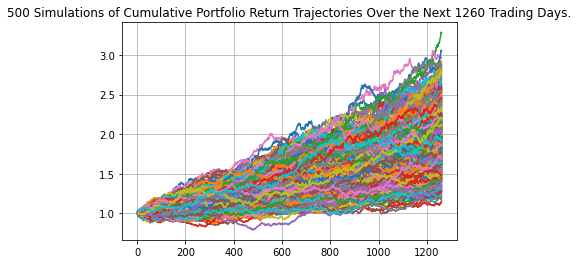

In [11]:
line_plot = MC_fiveyear.plot_simulation()

line_plot.grid()

line_plot.get_figure().savefig('MC_fiveyear_sim_plot.png',bbox_inches='tight')

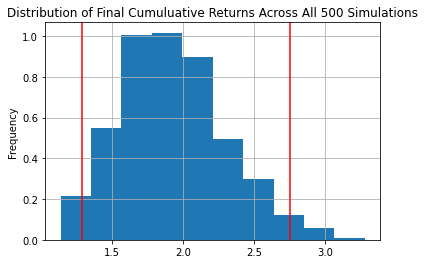

In [12]:
dist_plot = MC_fiveyear.plot_distribution()
dist_plot.grid()
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [13]:
summary_stat_data = MC_fiveyear.summarize_cumulative_return()
print(summary_stat_data)

count           500.000000
mean              1.926556
std               0.368305
min               1.135341
25%               1.666360
50%               1.899699
75%               2.147476
max               3.278394
95% CI Lower      1.286325
95% CI Upper      2.750555
Name: 1260, dtype: float64


In [14]:
#Range of possible outcomes based on the confidence interval
ci_lower = round(summary_stat_data[8]*10000,2)
ci_upper = round(summary_stat_data[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next five years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

There is a 95% chance that an initial investment of $10000 in the portfolio over the next five years will end within the range of$12863.25and $27505.55


In [15]:
sim_ret_data = {
    "mean": list(MC_fiveyear.simulated_return.mean(axis=1)),
                 "median": list(MC_fiveyear.simulated_return.median(axis=1)),
                                "min": list(MC_fiveyear.simulated_return.min(axis=1)),
                                            "max": list(MC_fiveyear.simulated_return.max(axis=1))}
               
df_sim_ret = pd.DataFrame(sim_ret_data)
               
df_sim_ret.tail()

,mean,median,min,max
1256,1.922230,1.896234,1.137325,3.230386
1257,1.924284,1.900113,1.135752,3.258601
1258,1.924363,1.897281,1.146009,3.287543
1259,1.925193,1.903242,1.139847,3.281213
1260,1.926556,1.899699,1.135341,3.278394


<AxesSubplot:title={'center':'Sim daily return behavior of stock over the next five years'}>

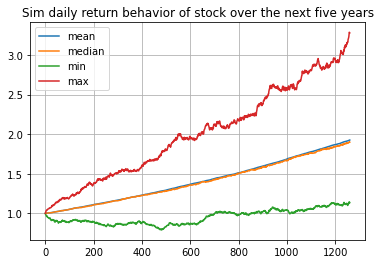

In [16]:
df_sim_ret.plot(grid=True,title='Sim daily return behavior of stock over the next five years')

### S&P500 Data analysis and prediction

In [17]:
sp500_data.describe()

SPY                                                  
             open        high         low       close        volume
count  932.000000  932.000000  932.000000  932.000000  9.320000e+02
mean   288.263191  289.861309  286.423485  288.271850  7.256039e+07
std     32.566290   32.685114   32.457259   32.545228  5.238206e+07
min    228.190000  229.683300  218.260000  222.510000  1.531436e+07
25%    265.845000  267.465000  263.383800  265.520000  4.094123e+07
50%    282.600000  284.155000  280.680000  282.765000  5.360248e+07
75%    306.092500  308.327500  302.872500  306.385000  7.995437e+07
max    380.590000  381.490000  378.100000  381.240000  3.639317e+08

In [18]:
df_closing_prices_spy = sp500_data['SPY']['close']

df_closing_prices_spy = pd.DataFrame(df_closing_prices_spy)

df_closing_prices_spy.index = df_closing_prices_spy.index.date 

df_daily_returns_spy = df_closing_prices_spy.pct_change().dropna()

df_daily_returns_spy.head()

,close
2017-05-05,0.004063
2017-05-08,-0.000209
2017-05-09,-0.000876
2017-05-10,0.001629
2017-05-11,-0.001834


### S&P five year prediction using MC simulation

In [19]:
# Configuring the sim
MC_SPY_fiveyear = MCSimulation(
    portfolio_data = sp500_data,
    weights = [1],
    num_simulation = 500,
    num_trading_days =252*5)

In [20]:
#Sim input data
MC_SPY_fiveyear.portfolio_data.tail()

SPY                                      \
                             open    high       low   close    volume   
time                                                                    
2021-01-08 00:00:00-05:00  380.59  381.49  377.1000  381.24  60275466   
2021-01-11 00:00:00-05:00  377.85  380.58  377.7189  378.74  44814805   
2021-01-12 00:00:00-05:00  378.89  379.86  376.3600  378.81  45364896   
2021-01-13 00:00:00-05:00  378.69  380.86  377.8500  379.76  38355050   
2021-01-14 00:00:00-05:00  380.59  381.13  378.1000  378.45  41045335   

                                        
                          daily_return  
time                                    
2021-01-08 00:00:00-05:00     0.005751  
2021-01-11 00:00:00-05:00    -0.006558  
2021-01-12 00:00:00-05:00     0.000185  
2021-01-13 00:00:00-05:00     0.002508  
2021-01-14 00:00:00-05:00    -0.003450

In [21]:
MC_SPY_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001472,1.015031,1.027794,1.021218,1.013104,1.003254,0.986434,0.971673,0.978691,0.993655,...,1.003775,1.007050,0.984476,0.983904,0.989279,0.991138,1.015308,0.985778,0.994435,0.999590
2,1.005864,1.008600,1.037750,1.047518,1.038612,1.000218,1.009721,0.998838,0.985442,0.982252,...,1.011501,1.010116,0.986429,0.981868,1.018260,0.991557,1.027369,0.993518,1.014030,0.997250
3,0.977769,1.011736,1.024900,1.040527,1.034436,0.966247,1.025959,1.017886,0.971073,0.974329,...,1.002168,1.016162,0.976656,0.975608,1.013295,0.971362,1.045375,0.990830,1.036898,1.005765
4,1.004400,1.006412,1.031418,1.045418,1.033458,0.965383,1.024875,1.020668,0.954955,0.988093,...,0.990436,0.996497,0.964295,0.991337,1.041555,0.979219,1.043449,1.001881,1.044922,0.992456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.209321,2.120428,2.042066,2.388871,1.734762,2.675753,1.958014,3.779797,1.259667,1.576051,...,4.187108,0.725778,1.112808,2.786553,2.393063,1.814027,0.866447,1.688760,1.394119,2.438848
1257,2.231642,2.107195,2.061113,2.404993,1.761596,2.693820,1.961087,3.742223,1.270859,1.625826,...,4.179712,0.727692,1.136617,2.799616,2.322080,1.827921,0.858501,1.671944,1.397318,2.486478
1258,2.197700,2.088285,2.075326,2.383596,1.754246,2.710686,1.951234,3.669567,1.263144,1.603783,...,4.217102,0.713247,1.133925,2.765543,2.354312,1.794114,0.852714,1.687129,1.417419,2.502846
1259,2.195907,2.086409,2.091094,2.371271,1.721042,2.712274,1.904737,3.672892,1.293348,1.600676,...,4.236908,0.718901,1.138282,2.699762,2.362436,1.800332,0.837124,1.703759,1.443073,2.511789


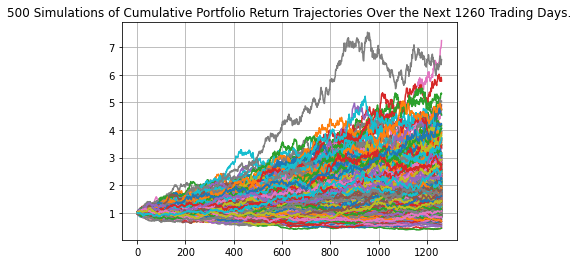

In [22]:
line_SPY_plot = MC_SPY_fiveyear.plot_simulation()

line_SPY_plot.grid()

line_SPY_plot.get_figure().savefig('MC_fiveyear_sim_plot.png',bbox_inches='tight')

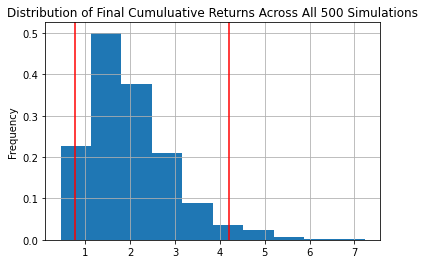

In [23]:
dist_plot_SPY = MC_SPY_fiveyear.plot_distribution()
dist_plot_SPY.grid()
dist_plot_SPY.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [24]:
summary_stat_data_SPY = MC_SPY_fiveyear.summarize_cumulative_return()
print(summary_stat_data_SPY)

count           500.000000
mean              2.010873
std               0.952454
min               0.443887
25%               1.328764
50%               1.809289
75%               2.479895
max               7.234115
95% CI Lower      0.772943
95% CI Upper      4.196135
Name: 1260, dtype: float64


In [25]:
#Range of possible outcomes based on the confidence interval
ci_lower = round(summary_stat_data_SPY[8]*10000,2)
ci_upper = round(summary_stat_data_SPY[9]*10000,2)

print(f'There is a 95% chance that an initial investment of $10000 in the portfolio '
      f'over the next five years will end within the range of'
      f'${ci_lower}and ${ci_upper}')

There is a 95% chance that an initial investment of $10000 in the portfolio over the next five years will end within the range of$7729.43and $41961.35


In [26]:
df_sim_ret_data_SPY = {
    "mean": list(MC_SPY_fiveyear.simulated_return.mean(axis=1)),
                 "median": list(MC_SPY_fiveyear.simulated_return.median(axis=1)),
                                "min": list(MC_SPY_fiveyear.simulated_return.min(axis=1)),
                                            "max": list(MC_SPY_fiveyear.simulated_return.max(axis=1))}
               
df_sim_ret_data_SPY = pd.DataFrame(sim_ret_data)
               
df_sim_ret_data_SPY.tail()

,mean,median,min,max
1256,1.922230,1.896234,1.137325,3.230386
1257,1.924284,1.900113,1.135752,3.258601
1258,1.924363,1.897281,1.146009,3.287543
1259,1.925193,1.903242,1.139847,3.281213
1260,1.926556,1.899699,1.135341,3.278394


<AxesSubplot:title={'center':'Sim daily return behavior of S&P500 over the next five years'}>

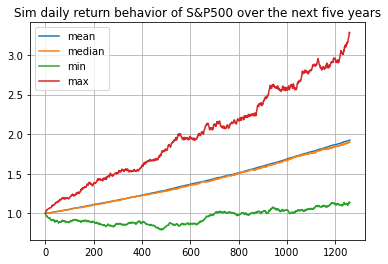

In [27]:
df_sim_ret_data_SPY.plot(grid=True,title='Sim daily return behavior of S&P500 over the next five years')###

## ESG portfolio comparison and analysis with benchmark S&P500

In [28]:
df_daily_returns_spy = df_daily_returns_spy.rename(columns={"close":"S&P 500"})

all_portfolios = pd.concat([df_daily_returns, df_daily_returns_spy], axis="columns", join="inner")
all_portfolios.head()

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
2017-05-05,0.000969,0.010275,0.006383,0.000000,-0.004685,0.012066,0.004063
2017-05-08,0.000055,-0.006689,0.001213,0.016593,-0.004707,-0.010432,-0.000209
2017-05-09,0.000183,-0.003665,0.000838,-0.013856,0.000676,-0.001506,-0.000876
2017-05-10,0.002755,0.001919,0.000653,-0.000588,0.016205,-0.001508,0.001629
2017-05-11,-0.003959,-0.003512,-0.003256,0.013838,-0.013953,0.000000,-0.001834


<AxesSubplot:title={'center':'Daily Returns'}>

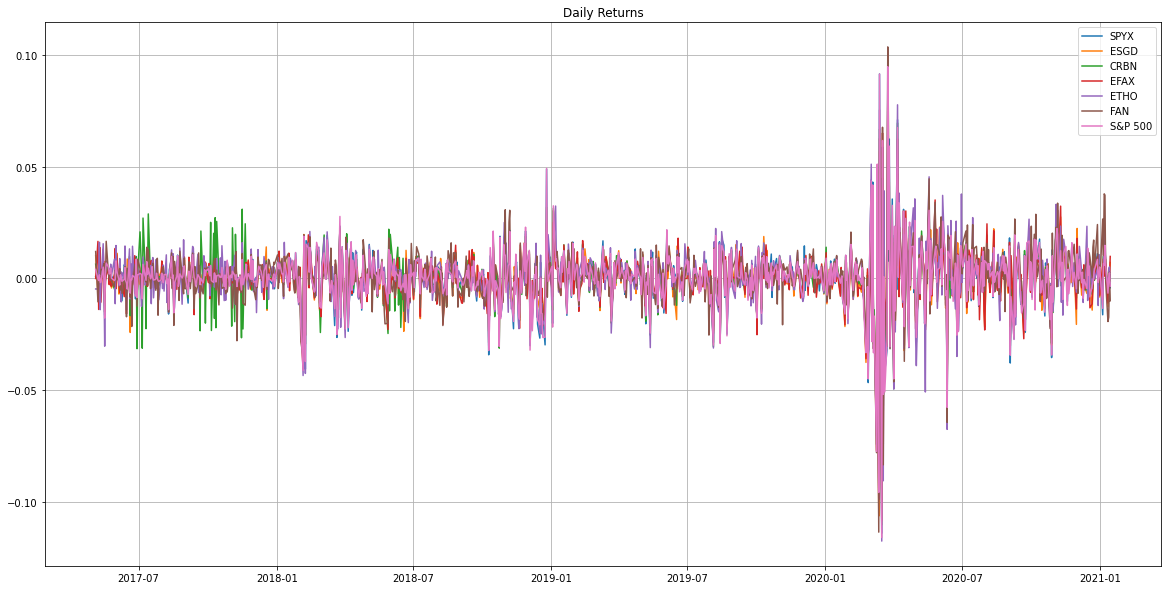

In [29]:
all_portfolios.plot(figsize=(20, 10), title="Daily Returns",grid=True)

<AxesSubplot:title={'center':'Cumulative Returns'}>

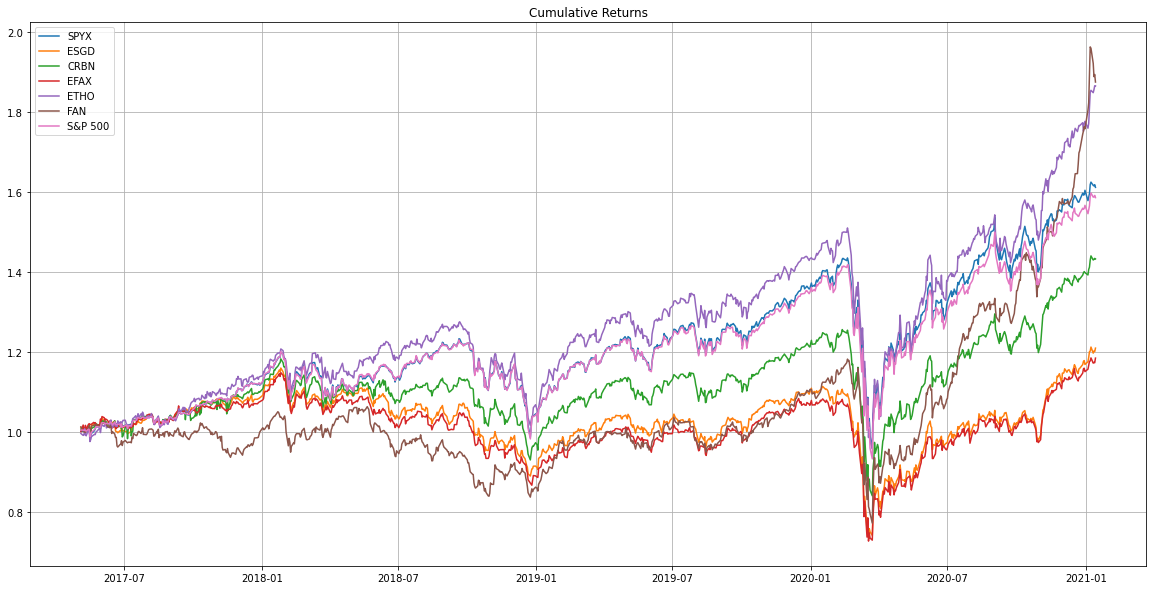

In [30]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns",grid=True)

In [31]:
# Calculate the daily standard deviations of all portfolios
all_portfolios.std()

SPYX       0.013275
ESGD       0.011895
CRBN       0.012852
EFAX       0.011755
ETHO       0.014278
FAN        0.013239
S&P 500    0.013324
dtype: float64

In [32]:
# Checking for risk comparisons of the funds against SP500 using the standard deviation
Sp500_risk = all_portfolios['S&P 500'].std()
all_portfolios.std() > Sp500_risk

SPYX       False
ESGD       False
CRBN       False
EFAX       False
ETHO        True
FAN        False
S&P 500    False
dtype: bool

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}>

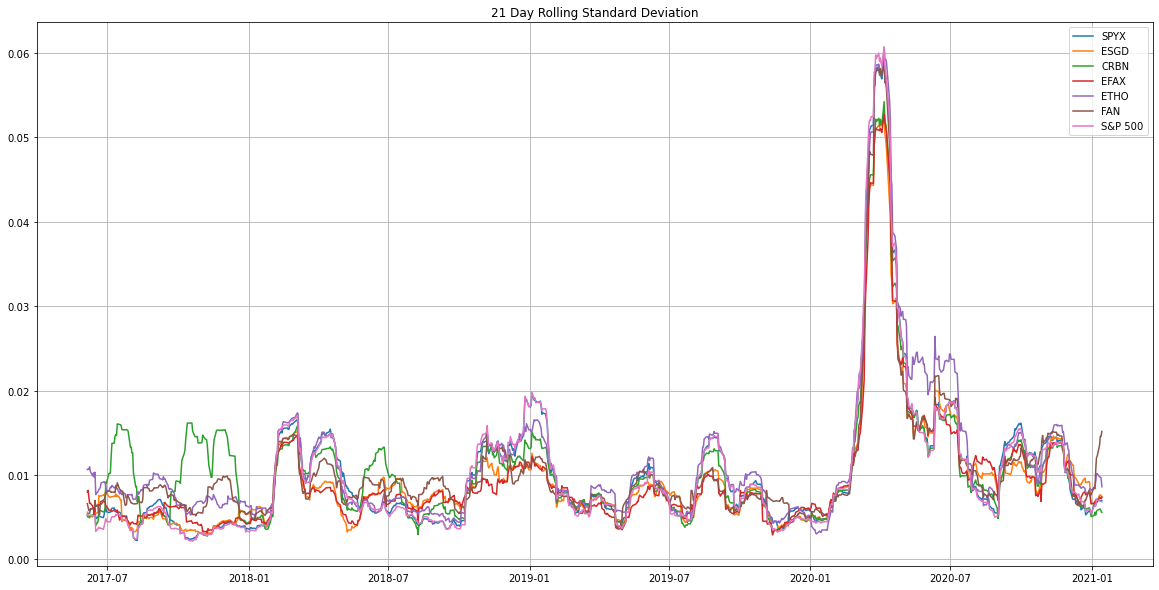

In [33]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
all_portfolios_roll_std = all_portfolios.rolling(window=21).std()

# Plot the rolling standard deviation
all_portfolios_roll_std.plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation",grid=True)

In [34]:
# Calculate the correlation
corr_df = all_portfolios.corr()

# Display de correlation matrix
corr_df.style.background_gradient(cmap="summer")

,SPYX,ESGD,CRBN,EFAX,ETHO,FAN,S&P 500
SPYX,1.000000,0.878973,0.913087,0.784630,0.884869,0.791267,0.985085
ESGD,0.878973,1.000000,0.898556,0.895339,0.830948,0.857370,0.885241
CRBN,0.913087,0.898556,1.000000,0.812752,0.846487,0.792353,0.914947
EFAX,0.784630,0.895339,0.812752,1.000000,0.787168,0.790553,0.788422
ETHO,0.884869,0.830948,0.846487,0.787168,1.000000,0.770138,0.878540
FAN,0.791267,0.857370,0.792353,0.790553,0.770138,1.000000,0.796858
S&P 500,0.985085,0.885241,0.914947,0.788422,0.878540,0.796858,1.000000


<AxesSubplot:title={'center':'FAN. Beta'}>

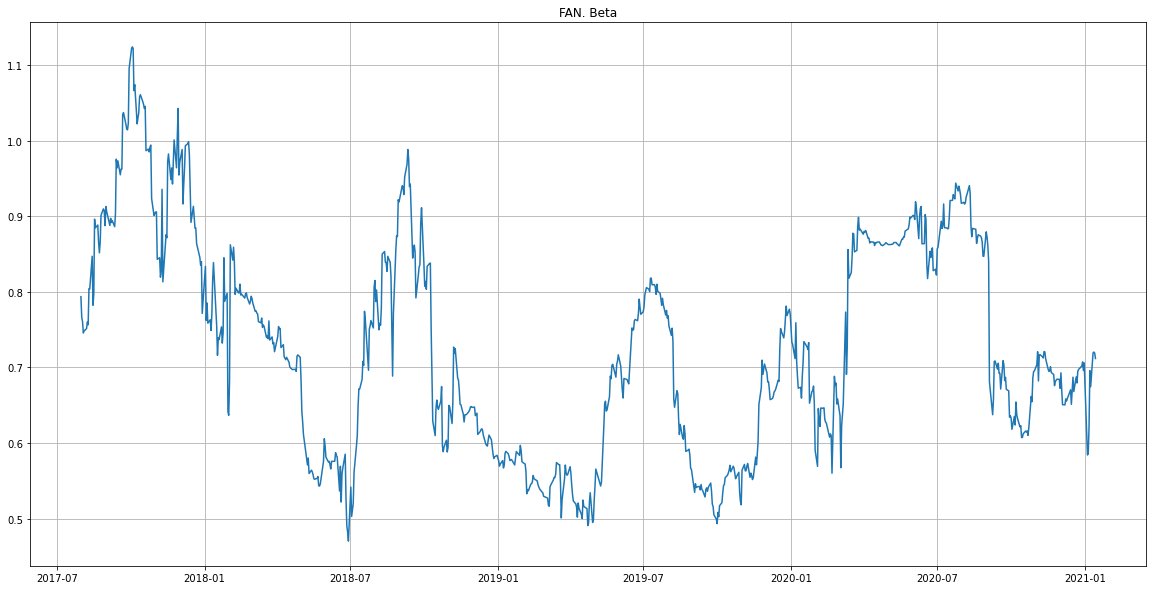

In [35]:
# Calculate covariance of a single portfolio
covariance = all_portfolios['FAN'].rolling(window=60).cov(all_portfolios["S&P 500"])

# Calculate variance of S&P TSX
variance = all_portfolios["S&P 500"].rolling(60).var()

# Computing beta
beta = covariance / variance

# Plot beta trend
beta.plot(figsize=(20, 10), title="FAN. Beta", grid=True) 

In [36]:
(beta, alpha) = stats.linregress(all_portfolios['S&P 500'].values,
                all_portfolios['FAN'].values)[0:2]
                
print("The portfolio beta is", round(beta, 4))
print("The portfolio alpha is", round(alpha, 5))

The portfolio beta is 0.7917
The portfolio alpha is 0.0003


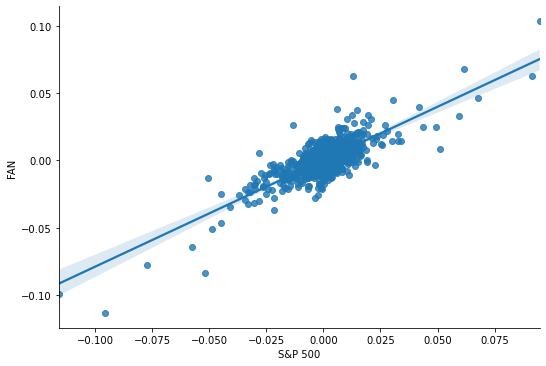

In [37]:
sns.lmplot(x='S&P 500', y='FAN', data=all_portfolios, aspect=1.5, fit_reg=True)

SPYX       0.718472
ESGD       0.367461
CRBN       0.579125
EFAX       0.339157
ETHO       0.858488
FAN        0.915186
S&P 500    0.696094
dtype: float64

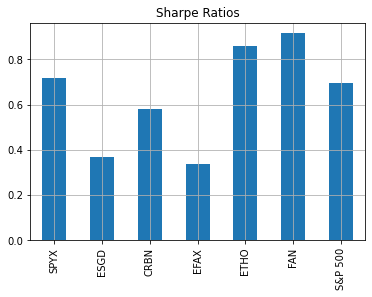

In [38]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_portfolios.std() * np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",grid=True)

sharpe_ratios

When comparing the ESG asset being evaluated versus the bench mark portfolio (S&P500), three of the ESG funds show a higher sharp ratio. Hence these assets provide better return, given the same risk (or the same return for a lower risk) 

In [48]:
esg_kurtosis = kurtosis(df_daily_returns, bias=False, fisher=True)
all_kurtosis = kurtosis(all_portfolios,bias=False,fisher=True)
sp500_kurtosis = kurtosis(df_daily_returns_spy, bias=False, fisher=True)

In [49]:
esg_skew = skew(df_daily_returns)
sp500_skew = skew(df_daily_returns_spy)

Based on the calculated kurtosis and skew, it can be observed that that the kurtosis for S&P500 and the ESG portfolio do compare with a marginal variability. Which in effect indicates that the benchmark and ESG portfolio entertain somewhat similar level of financial risk. Both the ESG portfolio and S&P500 show moderate skewedness except for a couple which tends to be highly skewed.

In [50]:
results = pd.DataFrame({'MEAN': all_portfolios.mean().round(2),'STANDARD DEVIATION':all_portfolios.std().round(4),\
                        'SKEWNESS':all_portfolios.skew().round(2),'EXCESS KURTOSIS':all_portfolios.kurtosis().round(1) })
results

,MEAN,STANDARD DEVIATION,SKEWNESS,EXCESS KURTOSIS
SPYX,0.0,0.0133,-0.70,16.5
ESGD,0.0,0.0119,-1.53,19.1
CRBN,0.0,0.0129,-1.04,14.1
EFAX,0.0,0.0118,-1.30,19.6
ETHO,0.0,0.0143,-0.88,14.5
FAN,0.0,0.0132,-0.92,18.1
S&P 500,0.0,0.0133,-0.71,17.6


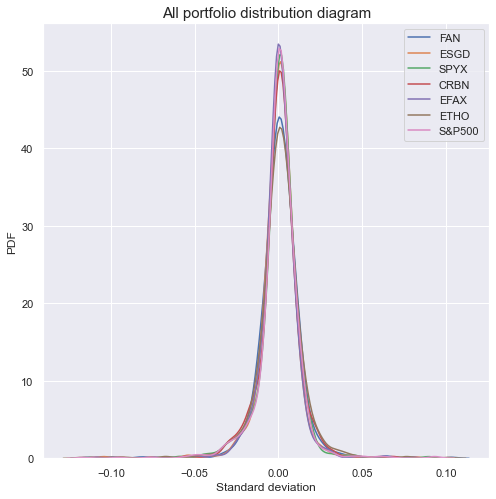

In [51]:
# plotting the three distributions 
sns.set(rc={'figure.figsize':(8,8)})
sns.kdeplot(all_portfolios['FAN'],  label="FAN")
sns.kdeplot(all_portfolios['ESGD'],  label="ESGD")
sns.kdeplot(all_portfolios['SPYX'],  label="SPYX")
sns.kdeplot(all_portfolios['CRBN'],  label="CRBN")
sns.kdeplot(all_portfolios['EFAX'], label="EFAX")
sns.kdeplot(all_portfolios['ETHO'],  label="ETHO")
sns.kdeplot(all_portfolios['S&P 500'],  label="S&P500")

plt.title("All portfolio distribution diagram",fontsize=15)
plt.ylabel('PDF')
plt.xlabel('Standard deviation')
plt.legend();
plt.show();

<AxesSubplot:>

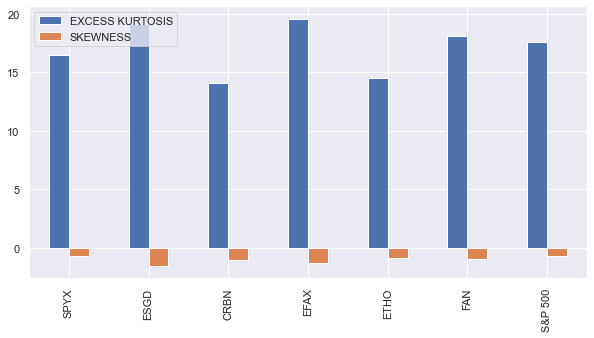

In [52]:
results = pd.DataFrame(results,columns=['MEAN','STANDARD DEVIATION','SKEWNESS','EXCESS KURTOSIS'])
results.plot(y=['EXCESS KURTOSIS','SKEWNESS'],kind="bar",figsize=(10,5))

## DashBoard

In [53]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

In [61]:
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.Div(children=[
    html.Div(children=[
    html.H1("Daily Return plot"),
    dcc.Graph(id='graph'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='column-dropdown', clearable=False, multi=True,
            value = all_portfolios.columns[0], options=[
                {'label': c, 'value': c}
                for c in all_portfolios.columns
            ])
    ]),
]),
html.Div(children=[
    html.H1("Cumm Return plot"),
    dcc.Graph(id='graph-1'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='cumm-column', clearable=False, multi=True,
            value = cumulative_returns.columns[0], options=[
                {'label': a, 'value': a}
                for a in cumulative_returns.columns
            ])
    ]),
]),
html.Div(children=[
    html.H1("Rolling STD plot"),
    dcc.Graph(id='graph-2'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='rolling-column', clearable=False, multi=True,
            value = all_portfolios_roll_std.columns[0], options=[
                {'label': a, 'value': a}
                for a in all_portfolios_roll_std.columns
            ])
    ]),
]),  
html.Div(children=[
    html.H1("Corr plot"),
    dcc.Graph(id='graph-3'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='corr-column', clearable=False, multi=True,
            value = all_portfolios.columns.tolist(), options=[
                {'label': a, 'value': a}
                for a in all_portfolios.columns
            ])
    ]),
]), 
html.Div(children=[
    html.H1("Sharpe Ratio"),
    dcc.Graph(id='graph-4'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='sharpe-ratio', clearable=False, multi=True,
            value = sharpe_ratios, 
            )
    ]),
]), 
html.Div(children=[
    html.H1("Fund Kurtosis"),
    dcc.Graph(id='graph-5'),
    html.Label([
        "Input Variable",
        dcc.Dropdown(
            id='allkurtosis', clearable=False, multi=True,
            value = all_kurtosis, 
            )
    ]),
])
])
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("column-dropdown", "value")]
)
def update_figure(column):
    return px.line(
        all_portfolios, y=column, x=all_portfolios.index,template = "plotly_dark",
        render_mode="webgl", title="Daily Returns"
)
@app.callback(
    Output('graph-1', 'figure'),
    [Input("cumm-column", "value")]
)
def update_figure(column):
    return px.line(
        cumulative_returns, y=column, x=cumulative_returns.index,template = "plotly_dark",
        render_mode="webgl", title="Cumulative Returns"
)
@app.callback(
    Output('graph-2', 'figure'),
    [Input("rolling-column", "value")]
)
def update_figure(column):
    return px.line(
        all_portfolios_roll_std, y=column, x=cumulative_returns.index,template = "plotly_dark",
        render_mode="webgl", title="Rolling STD"
)
@app.callback(
    Output('graph-3', 'figure'),
    [Input("corr-column", "value")]
)
def filter_heatmap(column):
    return px.imshow(
        all_portfolios.corr(),template = "plotly_dark",
)
@app.callback(
    Output('graph-4', 'figure'),
    [Input("sharpe-ratio", "value")]
)
def update_figure(column):
    return px.bar(
        sharpe_ratios,title='Sharp Ratio',color=all_portfolios.columns,template = "plotly_dark",
        labels={
                     "index": "Funds",
                     "value": "Sharp Ratio",
                 },
)
@app.callback(
    Output('graph-5', 'figure'),
    [Input("allkurtosis", "kurtosis")]
)
def update_figure(column):
    return px.bar(
        kurtosis(all_portfolios),title='Kurtosis plot',color=all_portfolios.columns,template = "plotly_dark",
        labels={
                     "index": "Funds",
                     "value": "kurtosis"
                 },
)
# Run app and display result inline in the notebook
app.run_server(mode='external')

Dash app running on http://127.0.0.1:8050/


In [ ]:
inline